## Actividad 5

El objetivo del ejercicio actual es utilizar medidas físicas para predecir la edad del abulón, usando el algoritmo K-NN

In [109]:
import pandas as pd 
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
       "/abalone/abalone.data" )
abalone = pd.read_csv(url, header=None) 
abalone.columns = [     "Sex",     "Length",     "Diameter",     "Height",     "Whole weight",     "Shucked weight",     "Viscera weight",     "Shell weight",     "Rings", ] 
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### 1.  Lo primero que debe hacer es eliminar la variable “Sex”.

In [110]:
abalone.drop('Sex',axis=1,inplace=True)
abalone.sample()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1109,0.52,0.4,0.145,0.7765,0.3525,0.1845,0.185,9


#### 2.  Realice estadística descriptiva para el conjunto de datos entregados.

In [111]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [112]:
abalone.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

#### 3.  La  variable  objetivo  es  “Rings”,  por  lo  que  muestre  la  distribución  de estos datos e interprete. 

In [113]:
ring_distribution = abalone['Rings'].value_counts().sort_index()
ring_distribution

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [114]:
import seaborn as sns

<AxesSubplot:xlabel='Rings', ylabel='Count'>

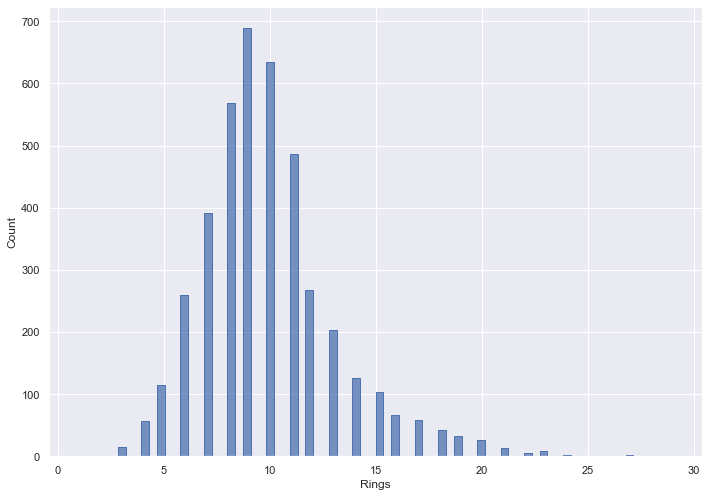

In [115]:
sns.histplot(x='Rings', data=abalone, shrink = 1,element = "step")

In [116]:
import matplotlib.pyplot as plt

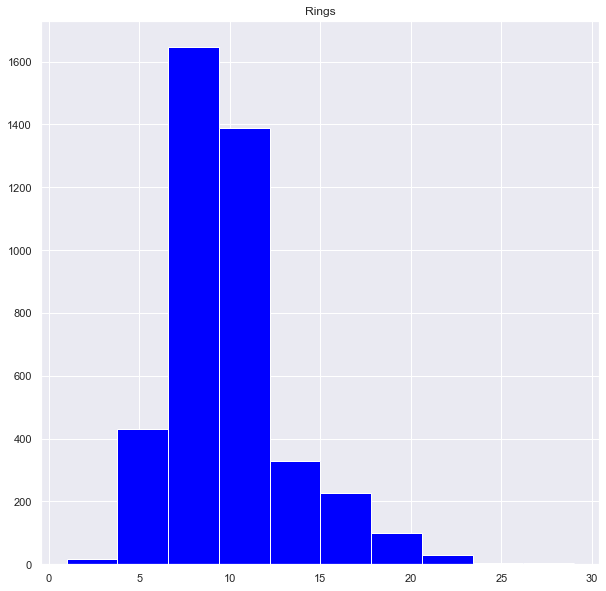

In [117]:
#plt.subplot(2,2,1)
plt.figure(figsize=(10,10))
plt.hist(abalone['Rings'], color='blue')
plt.title('Rings')
plt.show()

**El numero de anillos tiene una distribucion normal en esta muestra**

#### 4.  Entregue la matriz de correlación ¿Qué variables pueden estar correlacionadas?

In [118]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:>

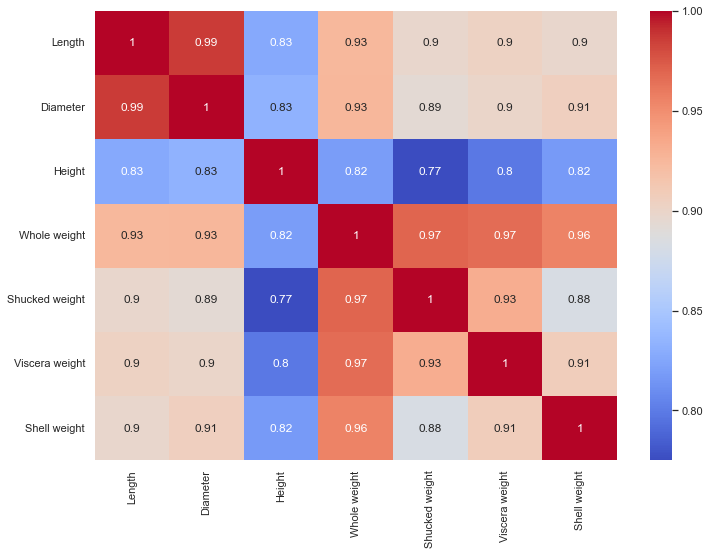

In [119]:
sns.heatmap(abalone.drop(columns=["Rings"]).corr(), annot=True,cmap = 'coolwarm')

#### 5.  Defina  las  distancias  en  los  vectores  de  las  variables  independientes. Para esto puede usar el atributo .values de Numpy

In [120]:
import numpy as np

In [121]:
X = abalone['Rings'].values

In [122]:
# Calcular la distancia entre las columnas
new_data_point = {}
for i in abalone:
    new_data_point[i] = (abalone[i].values)

#### 6.  Guarde los datos en una matriz y úselo en este código:

In [123]:
import numpy as np

In [124]:
X = abalone.drop(columns=['Rings']).values

In [125]:
'''
for i in new_data_point:
    for j in abalone:
        distances = np.linalg.norm(new_data_point[i] - abalone[j].values, axis=0)
        print(f'Distancia entre {i} y {j} es:',distances)
'''


"\nfor i in new_data_point:\n    for j in abalone:\n        distances = np.linalg.norm(new_data_point[i] - abalone[j].values, axis=0)\n        print(f'Distancia entre {i} y {j} es:',distances)\n"

#### 7.  Determine cuáles son los tres vecinos más cercanos. 

In [126]:
new_data_point = np.array([0,0,0,0,0,0,0])
distances = np.linalg.norm(X - new_data_point, axis=1)

In [127]:
idx = np.argsort(distances)

In [128]:
k = 3
print(idx[:k])
print(distances[idx[:k]])
print(abalone.iloc[idx[:k]])

[ 236  238 2114]
[0.09358152 0.14554467 0.16534736]
      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
236    0.075     0.055   0.010        0.0020          0.0010          0.0005   
238    0.110     0.090   0.030        0.0080          0.0025          0.0020   
2114   0.130     0.095   0.035        0.0105          0.0050          0.0065   

      Shell weight  Rings  
236         0.0015      1  
238         0.0030      3  
2114        0.0035      4  


**Los tres vecinos mas cercanos del punto dado (origen) son los registros [236,238,2114]**